<a href="https://colab.research.google.com/github/songKanawat/bootcamp_projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Library & dataset

In [1]:
#Install packages if not already installed
#install.packages(c("tidyverse",
#                   "titanic",
#                   "ggthemes"))
library(tidyverse)
library(ggthemes)
library(titanic)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

## Preview Data

In [ ]:
#head(titanic_train)
#tail(titanic_train)
glimpse(titanic_train)
#View(titanic_train)

Rows: 891
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ Survived    <int> 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1…
$ Pclass      <int> 3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "mal…
$ Age         <dbl> 22, 38, 26, 35, 35, NA, 54, 2, 27, 14, 4, 58, 20, 39, 14, …
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 8.4583, 51.8625,…
$ Cabin       <chr> "", "C85", "", "C123", "", "", "E46", "", "", "", "G6", "C…
$ Embarked    <chr> "S", "C", "S", "S", "S", "Q", "S", "S", "S", "C", "S", "S"…


## Prep Data

In [ ]:
# Drop NA (missing value)
titanic_train <- na.omit(titanic_train)
#nrow(titanic_train)

# Convert the data type of the Survived column to factor
titanic_train <- titanic_train %>% 
  mutate(Survived = factor(Survived,
                           levels = c(0, 1),
                           labels = c("Died", "Survived")))
# Recheck if 'Survived' column is factor
#head(titanic_train)
glimpse(titanic_train)

Rows: 714
Columns: 12
$ PassengerId <int> 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19…
$ Survived    <fct> Died, Survived, Survived, Survived, Died, Died, Died, Surv…
$ Pclass      <int> 3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 3, 2, 2, 3…
$ Name        <chr> "Braund, Mr. Owen Harris", "Cumings, Mrs. John Bradley (Fl…
$ Sex         <chr> "male", "female", "female", "female", "male", "male", "mal…
$ Age         <dbl> 22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, …
$ SibSp       <int> 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0…
$ Parch       <int> 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0…
$ Ticket      <chr> "A/5 21171", "PC 17599", "STON/O2. 3101282", "113803", "37…
$ Fare        <dbl> 7.2500, 71.2833, 7.9250, 53.1000, 8.0500, 51.8625, 21.0750…
$ Cabin       <chr> "", "C85", "", "C123", "", "E46", "", "", "", "G6", "C103"…
$ Embarked    <chr> "S", "C", "S", "S", "S", "S", "S", "S", "C", "S", "S", "S"…


## Split Data

In [ ]:
## Split Data
set.seed(34)
n <- nrow(titanic_train)
id <- sample(1:n, size = n*0.7) ## 70% train 30% test
train_data <- titanic_train[id, ]
test_data <- titanic_train[-id, ] # minus for the rest

# check split row numbers
nrow(train_data)
nrow(test_data)

[1] 499

[1] 215

## Train Model

In [ ]:
## Train Model
# Fit Logistic Regression with trained dataset
model_train <- glm(Survived ~ Pclass + Age, data = train_data, family = "binomial")
summary(model_train)

train_data$prob_survived <- predict(model_train, type="response") ## probability
train_data$pred_survived <- if_else(train_data$prob_survived >= 0.5, "Survived", "Died")

error_train <- train_data$prob_survived
rmse_train <- sqrt(mean( error_train**2 ))
## Evaluate Model
# confusion matrix
train_conM <- table(train_data$pred_survived, train_data$Survived,
              dnn = c("Predicted", "Actual")) #dnn = the dimnames names


train_acc <- (train_conM[1,1] + train_conM[2,2]) / sum(train_conM)
train_prec <- train_conM[2,2] / (train_conM[2,1] +train_conM[2,2])
train_rcall <- train_conM[2,2] / (train_conM[1,2] +train_conM[2,2])
train_f1 <- 2 * ( (train_prec*train_rcall)/(train_prec+train_rcall) )

cat("Training data's RMSE:", rmse_train,
    "\nTraining data's Confusion Matrix",
    "\n    train_Accuracy:", train_acc,
    "\n    train_Precision:", train_prec,
    "\n    train_Recall:", train_rcall,
    "\n    train_F1 Score:", train_f1)


Call:
glm(formula = Survived ~ Pclass + Age, family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1697  -0.8539  -0.6223   1.0122   2.3983  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.579095   0.495881   7.218 5.29e-13 ***
Pclass      -1.240124   0.143826  -8.622  < 2e-16 ***
Age         -0.042487   0.008064  -5.268 1.38e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 671.99  on 498  degrees of freedom
Residual deviance: 579.05  on 496  degrees of freedom
AIC: 585.05

Number of Fisher Scoring iterations: 4


Training data's RMSE: 0.4507974 
Training data's Confusion Matrix 
    train_Accuracy: 0.6953908 
    train_Precision: 0.6578947 
    train_Recall: 0.5 
    train_F1 Score: 0.5681818

## Test Model

In [ ]:
## Test Model
# Fit Logistic Regression with tested dataset
model_test <- glm(Survived ~ Pclass + Age, data = test_data, family = "binomial")
summary(model_test)

test_data$prob_survived <- predict(model_test, type="response") ## probability
test_data$pred_survived <- if_else(test_data$prob_survived >= 0.5, "Survived", "Died")

error_test <- test_data$prob_survived
rmse_test <- sqrt(mean( error_test**2 ))
## Evaluate Model
# confusion matrix
test_conM <- table(test_data$pred_survived, test_data$Survived,
              dnn = c("Predicted", "Actual")) #dnn = the dimnames names


test_acc <- (test_conM[1,1] + test_conM[2,2]) / sum(test_conM)
test_prec <- test_conM[2,2] / (test_conM[2,1] +test_conM[2,2])
test_rcall <- test_conM[2,2] / (test_conM[1,2] +test_conM[2,2])
test_f1 <- 2 * ( (test_prec*test_rcall)/(test_prec+test_rcall) )

cat("Testing data's RMSE:", rmse_test,
    "\nTesting data's Confusion Matrix",
    "\n    test_Accuracy:", test_acc,
    "\n    test_Precision:", test_prec,
    "\n    test_Recall:", test_rcall,
    "\n    test_F1 Score:", test_f1)


Call:
glm(formula = Survived ~ Pclass + Age, family = "binomial", data = test_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8942  -0.8341  -0.6112   0.9813   2.0567  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.59310    0.71134   5.051 4.39e-07 ***
Pclass      -1.25466    0.21287  -5.894 3.77e-09 ***
Age         -0.04034    0.01233  -3.271  0.00107 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 292.33  on 214  degrees of freedom
Residual deviance: 248.28  on 212  degrees of freedom
AIC: 254.28

Number of Fisher Scoring iterations: 4


Testing data's RMSE: 0.4716619 
Testing data's Confusion Matrix 
    test_Accuracy: 0.7023256 
    test_Precision: 0.6756757 
    test_Recall: 0.5555556 
    test_F1 Score: 0.6097561

## Plot the comparison

Summary:
Training data's RMSE: 0.4507974 
Training data's Confusion Matrix 
    train_Accuracy: 0.6953908 
    train_Precision: 0.6578947 
    train_Recall: 0.5 
    train_F1 Score: 0.5681818 
Testing data's RMSE: 0.4716619 
Testing data's Confusion Matrix 
    test_Accuracy: 0.7023256 
    test_Precision: 0.6756757 
    test_Recall: 0.5555556 
    test_F1 Score: 0.6097561

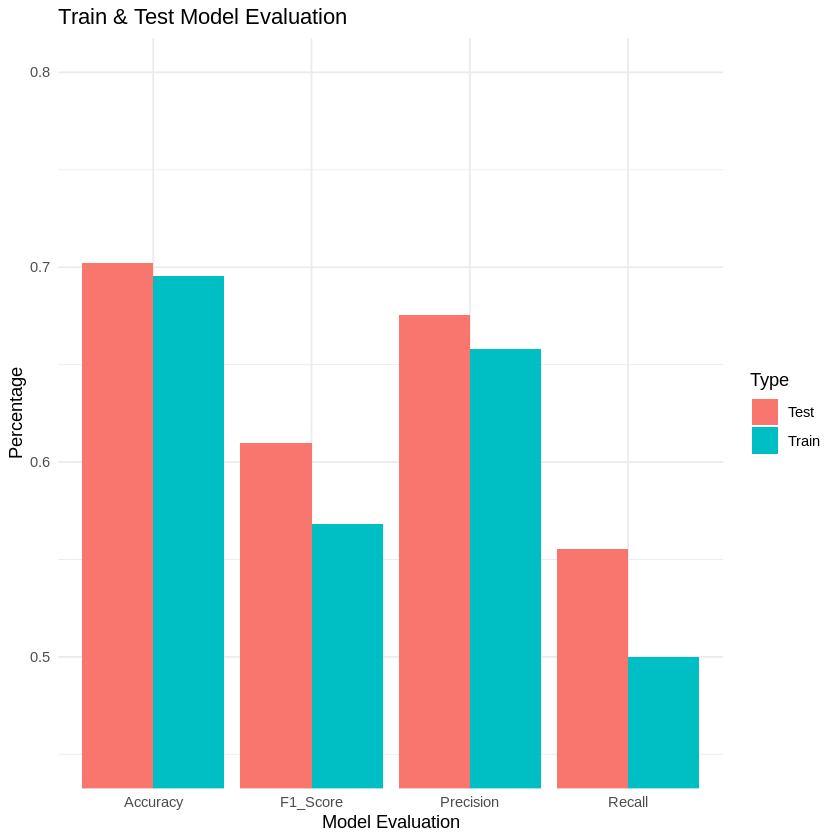

In [ ]:
cat("Summary:\nTraining data's RMSE:", rmse_train,
    "\nTraining data's Confusion Matrix",
    "\n    train_Accuracy:", train_acc,
    "\n    train_Precision:", train_prec,
    "\n    train_Recall:", train_rcall,
    "\n    train_F1 Score:", train_f1,
    "\nTesting data's RMSE:", rmse_test,
    "\nTesting data's Confusion Matrix",
    "\n    test_Accuracy:", test_acc,
    "\n    test_Precision:", test_prec,
    "\n    test_Recall:", test_rcall,
    "\n    test_F1 Score:", test_f1)

combine_model_result <- data.frame(
  Type = c('Train', 'Test'),
  Accuracy = c(train_acc, test_acc),
  Precision = c(train_prec, test_prec),
  Recall = c(train_rcall, test_rcall),
  F1_Score = c(train_f1, test_f1))


# Prep data by pivot data from wide to long
prep_data <- combine_model_result %>%
  pivot_longer( - Type ,
               names_to = "ModEval_Type",
               values_to = "percent")

ggplot(prep_data, aes(ModEval_Type, percent, fill = Type)) +
  geom_bar(stat='identity', position = 'dodge') + #stat='identity' for mapping values to the y aesthetic
  coord_cartesian(ylim = c(0.45, 0.8)) + #adjust y-axis scale limits
  theme_minimal() +
  labs(title = "Train & Test Model Evaluation",
       x ="Model Evaluation", y="Percentage")